<a href="https://colab.research.google.com/github/Anjum-Ul-Muqset/Malicious-URL-Detection/blob/main/Evaluating_Different_Machine_Learning_Models_to_Predict_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Taking Inputs**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import neighbors
from math import sqrt

from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

In [ ]:
housing = pd.read_csv('training data.csv')
compare = pd.read_csv('test sample.csv')
housing.head(10)

,Id,LotArea,Street,Alley,Utilities,Neighborhood,BldgType,HouseStyle,YearBuilt,RoofStyle,Foundation,Electrical,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,SaleCondition,SalePrice
0,1,8450.0,Pave,NaN,AllPub,CollgCr,1Fam,2Story,2003.0,Gable,PConc,SBrkr,1710.0,2.0,3.0,1.0,0.0,2.0,Normal,208500
1,2,9600.0,Pave,NaN,AllPub,Veenker,1Fam,1Story,1976.0,Gable,CBlock,SBrkr,1262.0,2.0,3.0,1.0,1.0,2.0,Normal,181500
2,3,11250.0,Pave,NaN,AllPub,CollgCr,1Fam,2Story,2001.0,Gable,PConc,SBrkr,1786.0,2.0,3.0,1.0,1.0,2.0,Normal,223500
3,4,9550.0,Pave,NaN,AllPub,Crawfor,1Fam,2Story,1915.0,Gable,BrkTil,SBrkr,1717.0,1.0,3.0,1.0,1.0,3.0,Abnorml,140000
4,5,14260.0,Pave,NaN,AllPub,NoRidge,1Fam,2Story,2000.0,Gable,PConc,SBrkr,2198.0,2.0,4.0,1.0,1.0,3.0,Normal,250000
5,6,14115.0,Pave,NaN,AllPub,Mitchel,1Fam,1.5Fin,1993.0,Gable,Wood,SBrkr,1362.0,1.0,1.0,1.0,0.0,2.0,Normal,143000
6,7,10084.0,Pave,NaN,AllPub,Somerst,1Fam,1Story,2004.0,Gable,PConc,SBrkr,1694.0,2.0,3.0,1.0,1.0,2.0,Normal,307000
7,8,10382.0,Pave,NaN,AllPub,NWAmes,1Fam,2Story,1973.0,Gable,CBlock,SBrkr,2090.0,2.0,3.0,1.0,2.0,2.0,Normal,200000
8,9,6120.0,Pave,NaN,AllPub,OldTown,1Fam,1.5Fin,1931.0,Gable,BrkTil,FuseF,1774.0,2.0,2.0,2.0,2.0,2.0,Abnorml,129900
9,10,7420.0,Pave,NaN,AllPub,BrkSide,2fmCon,1.5Unf,1939.0,Gable,BrkTil,SBrkr,1077.0,1.0,2.0,2.0,2.0,1.0,Normal,118000


# **Dataset Analysis**

In [ ]:
housing.describe()

,Id,LotArea,YearBuilt,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,SalePrice
count,1022.00000,1021.000000,1017.000000,1009.000000,1018.000000,1017.000000,1018.000000,1019.000000,1019.000000,1022.000000
mean,511.50000,10654.404505,1971.545723,1506.571853,1.565815,2.851524,1.048134,0.606477,1.758587,181713.254403
std,295.17029,11313.155791,30.057886,511.206642,0.550400,0.817248,0.227512,0.647799,0.743414,79854.663341
min,1.00000,1300.000000,1880.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,256.25000,7535.000000,1954.000000,1123.000000,1.000000,2.000000,1.000000,0.000000,1.000000,130000.000000
50%,511.50000,9450.000000,1974.000000,1456.000000,2.000000,3.000000,1.000000,1.000000,2.000000,163745.000000
75%,766.75000,11639.000000,2001.000000,1768.000000,2.000000,3.000000,1.000000,1.000000,2.000000,214975.000000
max,1022.00000,215245.000000,2010.000000,4676.000000,3.000000,8.000000,3.000000,3.000000,4.000000,755000.000000


In [ ]:
compare.describe()

,Id,LotArea,YearBuilt,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,SalePrice
count,438.000000,438.000000,436.000000,436.000000,436.000000,435.000000,437.000000,437.000000,437.000000,438.000000
mean,1241.500000,10194.936073,1970.431193,1535.607798,1.559633,2.898851,1.043478,0.622426,1.780320,179073.059361
std,126.583964,5808.066162,30.565435,562.579245,0.553878,0.816801,0.204165,0.636613,0.755577,78531.935665
min,1023.000000,1477.000000,1872.000000,438.000000,0.000000,0.000000,1.000000,0.000000,0.000000,52500.000000
25%,1132.250000,7566.250000,1950.750000,1140.750000,1.000000,2.000000,1.000000,0.000000,1.000000,129125.000000
50%,1241.500000,9511.500000,1971.000000,1480.000000,2.000000,3.000000,1.000000,1.000000,2.000000,161750.000000
75%,1350.750000,11426.250000,2000.000000,1797.000000,2.000000,3.000000,1.000000,1.000000,2.000000,208425.000000
max,1460.000000,63887.000000,2009.000000,5642.000000,3.000000,6.000000,2.000000,3.000000,4.000000,745000.000000


In [ ]:
housing.shape


(1022, 20)

In [ ]:
compare.shape

(438, 20)

In [ ]:
(housing.isnull().sum())

Id                 0
LotArea            1
Street             0
Alley            957
Utilities         10
Neighborhood       5
BldgType           9
HouseStyle         4
YearBuilt          5
RoofStyle          3
Foundation         5
Electrical         9
GrLivArea         13
FullBath           4
BedroomAbvGr       5
KitchenAbvGr       4
Fireplaces         3
GarageCars         3
SaleCondition      0
SalePrice          0
dtype: int64

In [ ]:
(compare.isnull().sum())

Id                 0
LotArea            0
Street             0
Alley            412
Utilities          2
Neighborhood       2
BldgType           2
HouseStyle         2
YearBuilt          2
RoofStyle          3
Foundation         3
Electrical         4
GrLivArea          2
FullBath           2
BedroomAbvGr       3
KitchenAbvGr       1
Fireplaces         1
GarageCars         1
SaleCondition      1
SalePrice          0
dtype: int64

# **DATASET PRE PROCESSING**


## **Removing columns which have excessive null values & unnecessary data**

In [ ]:
# Alley has 957 null values so we are removing the colomun alley.
housing.drop(['Alley'], axis=1, inplace=True)

# Id is just serial number which is also not nescessary.
housing.drop(['Id'], axis=1, inplace=True)

housing.shape

(1022, 18)

In [ ]:
(housing.isnull().sum())

LotArea           1
Street            0
Utilities        10
Neighborhood      5
BldgType          9
HouseStyle        4
YearBuilt         5
RoofStyle         3
Foundation        5
Electrical        9
GrLivArea        13
FullBath          4
BedroomAbvGr      5
KitchenAbvGr      4
Fireplaces        3
GarageCars        3
SaleCondition     0
SalePrice         0
dtype: int64

array([[<Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'GrLivArea'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'KitchenAbvGr'}>],
       [<Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'GarageCars'}>,
        <Axes: title={'center': 'SalePrice'}>]], dtype=object)

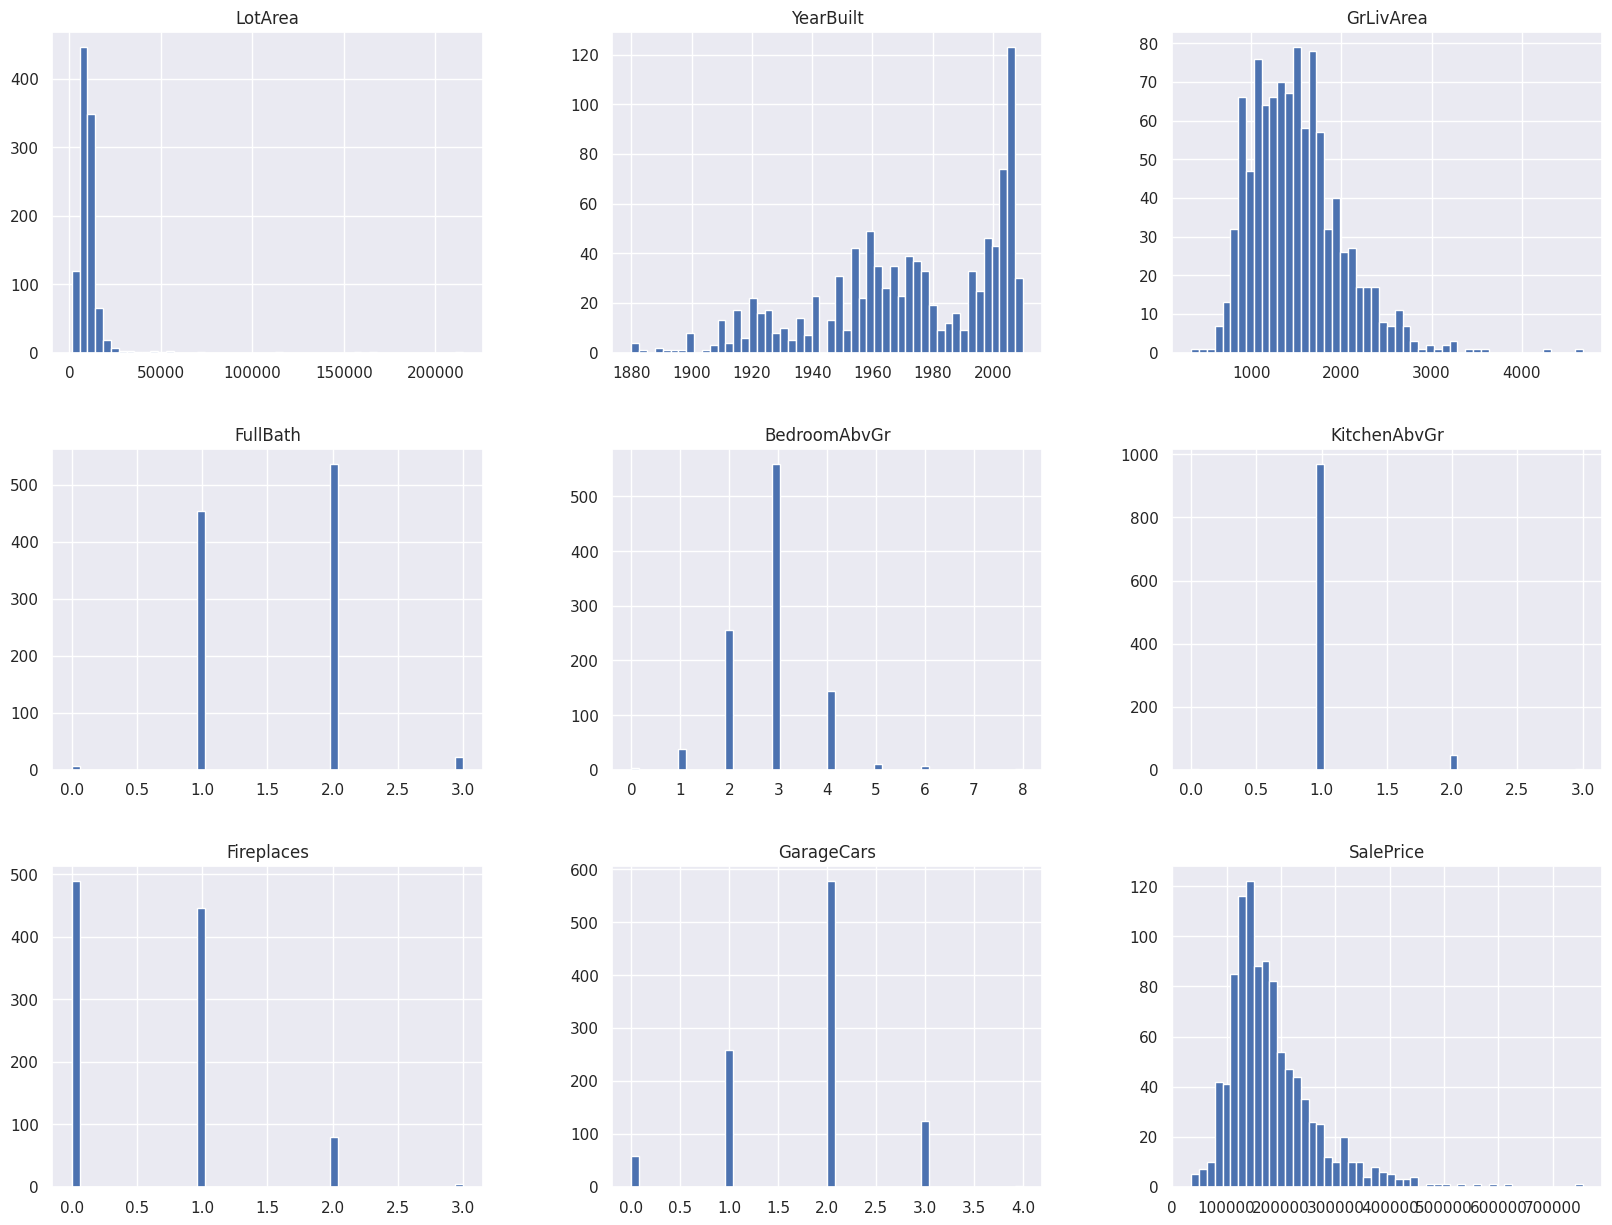

In [ ]:
%matplotlib inline

housing.hist(bins=50,figsize=(20,15))

In [ ]:
# Alley has 412 null values so we are removing the colomun alley.
compare.drop(['Alley'], axis=1, inplace=True)

# Id is just serial number which is also not nescessary.
compare.drop(['Id'], axis=1, inplace=True)

compare.shape

(438, 18)

In [ ]:
(compare.isnull().sum())

LotArea          0
Street           0
Utilities        2
Neighborhood     2
BldgType         2
HouseStyle       2
YearBuilt        2
RoofStyle        3
Foundation       3
Electrical       4
GrLivArea        2
FullBath         2
BedroomAbvGr     3
KitchenAbvGr     1
Fireplaces       1
GarageCars       1
SaleCondition    1
SalePrice        0
dtype: int64

array([[<Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'GrLivArea'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'KitchenAbvGr'}>],
       [<Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'GarageCars'}>,
        <Axes: title={'center': 'SalePrice'}>]], dtype=object)

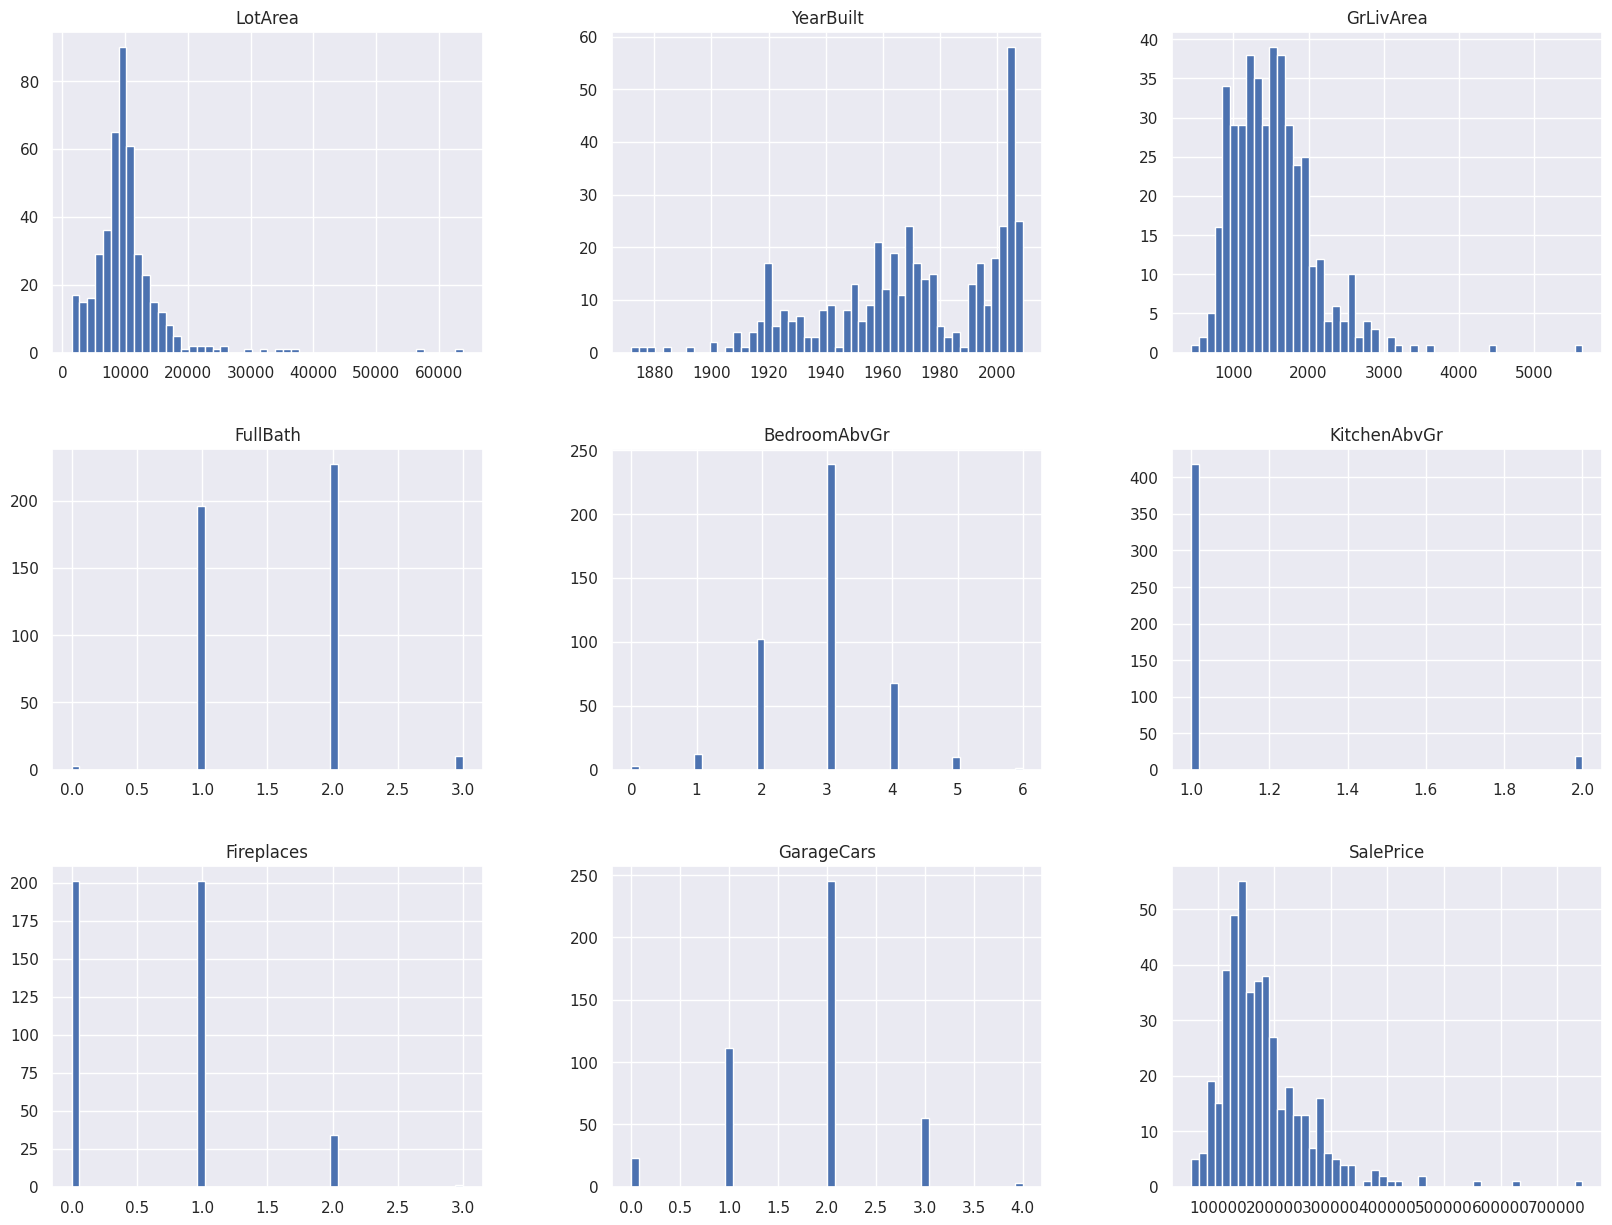

In [ ]:
%matplotlib inline

compare.hist(bins=50,figsize=(20,15))

## **Replaced integer columns with their mean value**

In [ ]:
imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean')

columns_to_impute = [0, 6, 10, 11, 12, 13, 14, 15]
df_to_impute = housing.iloc[:, columns_to_impute]
imputer1.fit(df_to_impute)
housing_imputed = pd.DataFrame(imputer1.transform(
    df_to_impute), columns=df_to_impute.columns)

housing.iloc[:, columns_to_impute] = housing_imputed

(housing.isnull().sum())

LotArea           0
Street            0
Utilities        10
Neighborhood      5
BldgType          9
HouseStyle        4
YearBuilt         0
RoofStyle         3
Foundation        5
Electrical        9
GrLivArea         0
FullBath          0
BedroomAbvGr      0
KitchenAbvGr      0
Fireplaces        0
GarageCars        0
SaleCondition     0
SalePrice         0
dtype: int64

In [ ]:
imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean')

columns_to_impute = [0, 6, 10, 11, 12, 13, 14, 15]
df_to_impute = compare.iloc[:, columns_to_impute]
imputer1.fit(df_to_impute)
compare_imputed = pd.DataFrame(imputer1.transform(
    df_to_impute), columns=df_to_impute.columns)

compare.iloc[:, columns_to_impute] = compare_imputed

(compare.isnull().sum())

<ipython-input-252-170d6ebd6433>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  compare.iloc[:, columns_to_impute] = compare_imputed


LotArea          0
Street           0
Utilities        2
Neighborhood     2
BldgType         2
HouseStyle       2
YearBuilt        0
RoofStyle        3
Foundation       3
Electrical       4
GrLivArea        0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Fireplaces       0
GarageCars       0
SaleCondition    1
SalePrice        0
dtype: int64

## **Replacing String Columns with most frequent values, Checking Any Negative price exists or not**



In [ ]:
imputer2 = SimpleImputer(strategy='most_frequent')

string_imputed = ['Utilities', 'Neighborhood',
                  'BldgType', 'HouseStyle', 'RoofStyle', 'Foundation', 'Electrical', 'SaleCondition']

housing[string_imputed] = imputer2.fit_transform(housing[string_imputed])

In [ ]:
if (housing['SalePrice'] < 0).any():
    print("Sale Price column has negative values")
else:
    print("Sale Price column does not have negative values")

Sale Price column does not have negative values


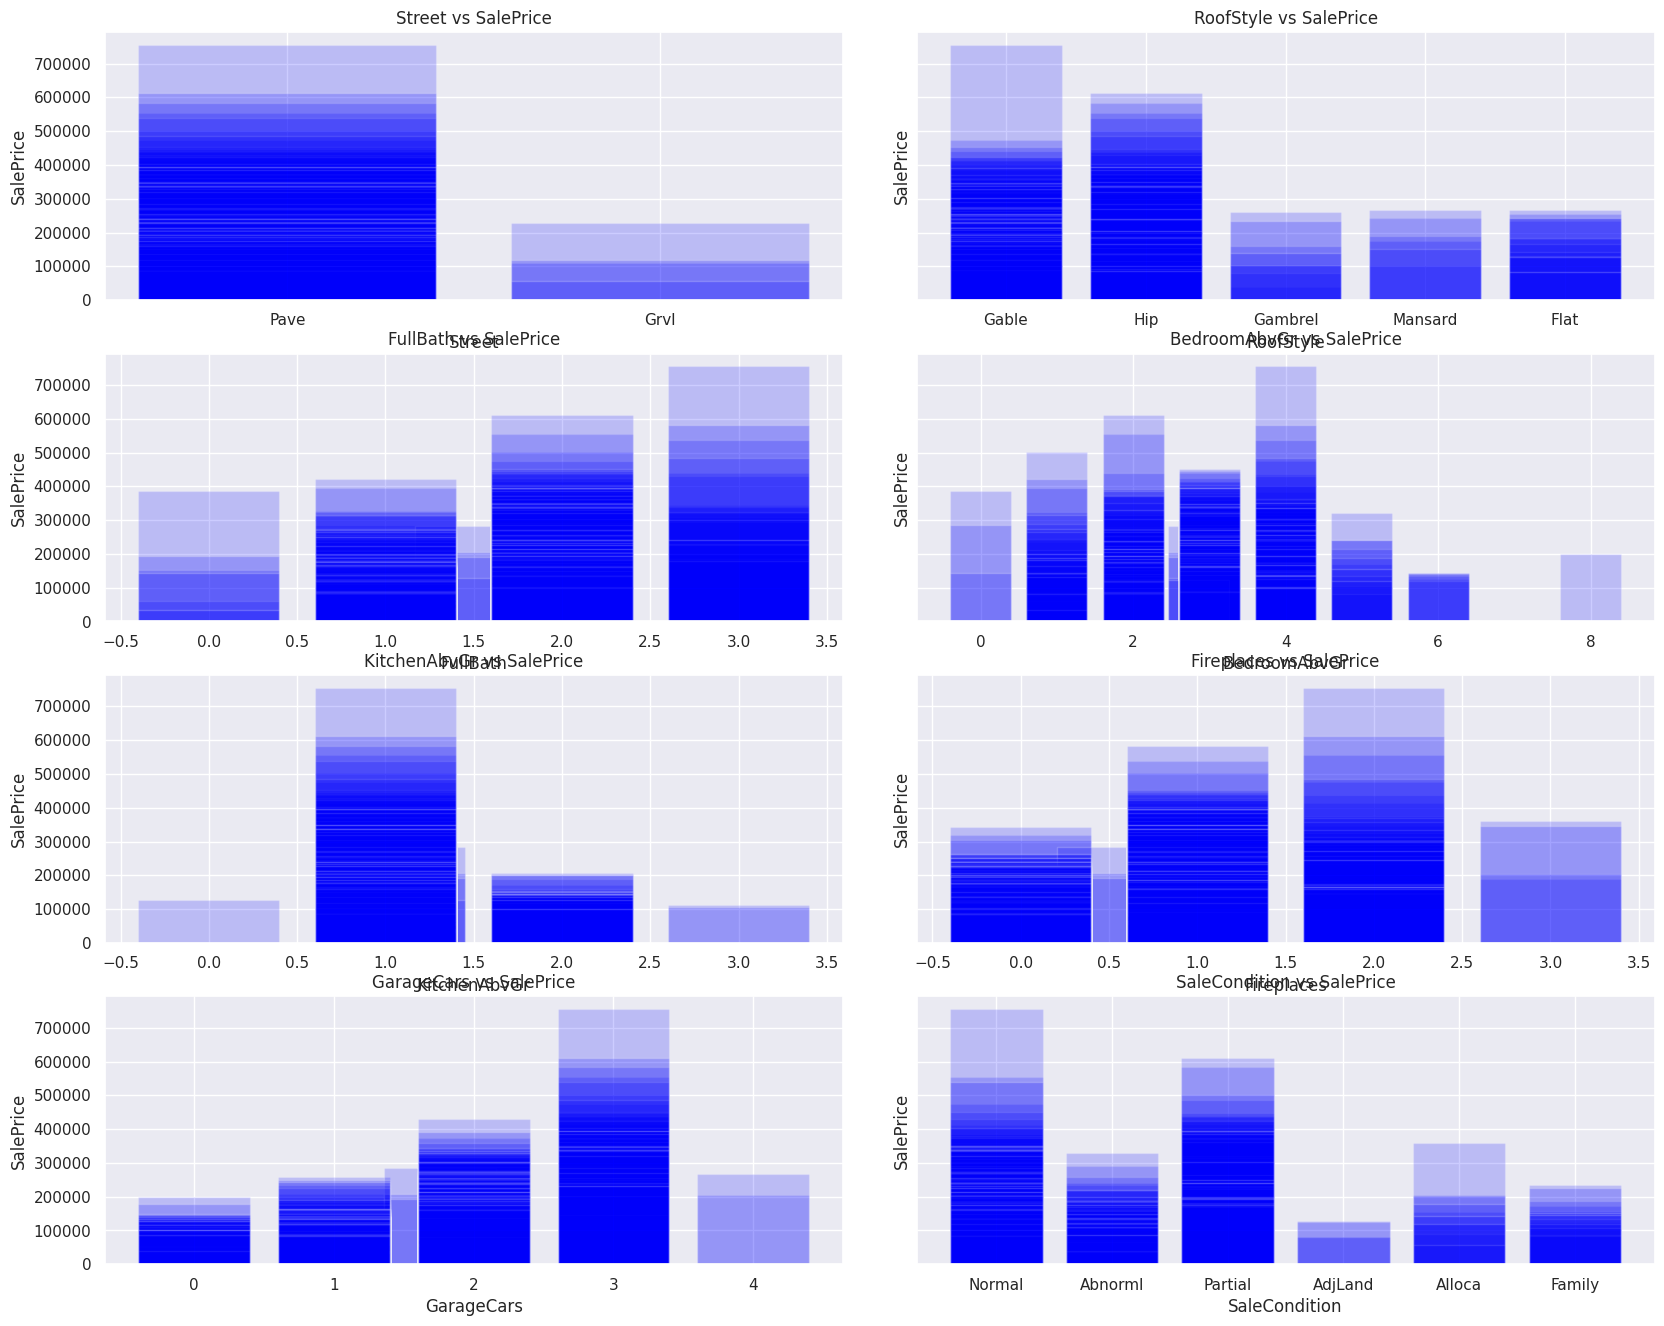

In [ ]:
columns_to_plot = [1, 7, 11, 12, 13, 14, 15, 16]
target = "SalePrice"

figure, axs = plt.subplots(len(columns_to_plot) // 2 + len(columns_to_plot) %
                        2, 2, figsize=(20, len(columns_to_plot) * 2), sharey=True, squeeze=True)

for i, column in enumerate(columns_to_plot):
    axs[i // 2, i % 2].bar(housing.iloc[:, column], housing[target], color='Blue', alpha=0.2)
    axs[i // 2, i % 2].set_xlabel(housing.columns[column])
    axs[i // 2, i % 2].set_ylabel(target)
    axs[i // 2, i % 2].set_title(f'{housing.columns[column]} vs {target}')

figure.subplots_adjust(wspace=0.1, hspace=0.2)

plt.show()

In [ ]:
compare[string_imputed] = imputer2.fit_transform(compare[string_imputed])

In [ ]:
if (compare['SalePrice'] < 0).any():
    print("Sale Price column has negative values")
else:
    print("Sale Price column does not have negative values")

Sale Price column does not have negative values


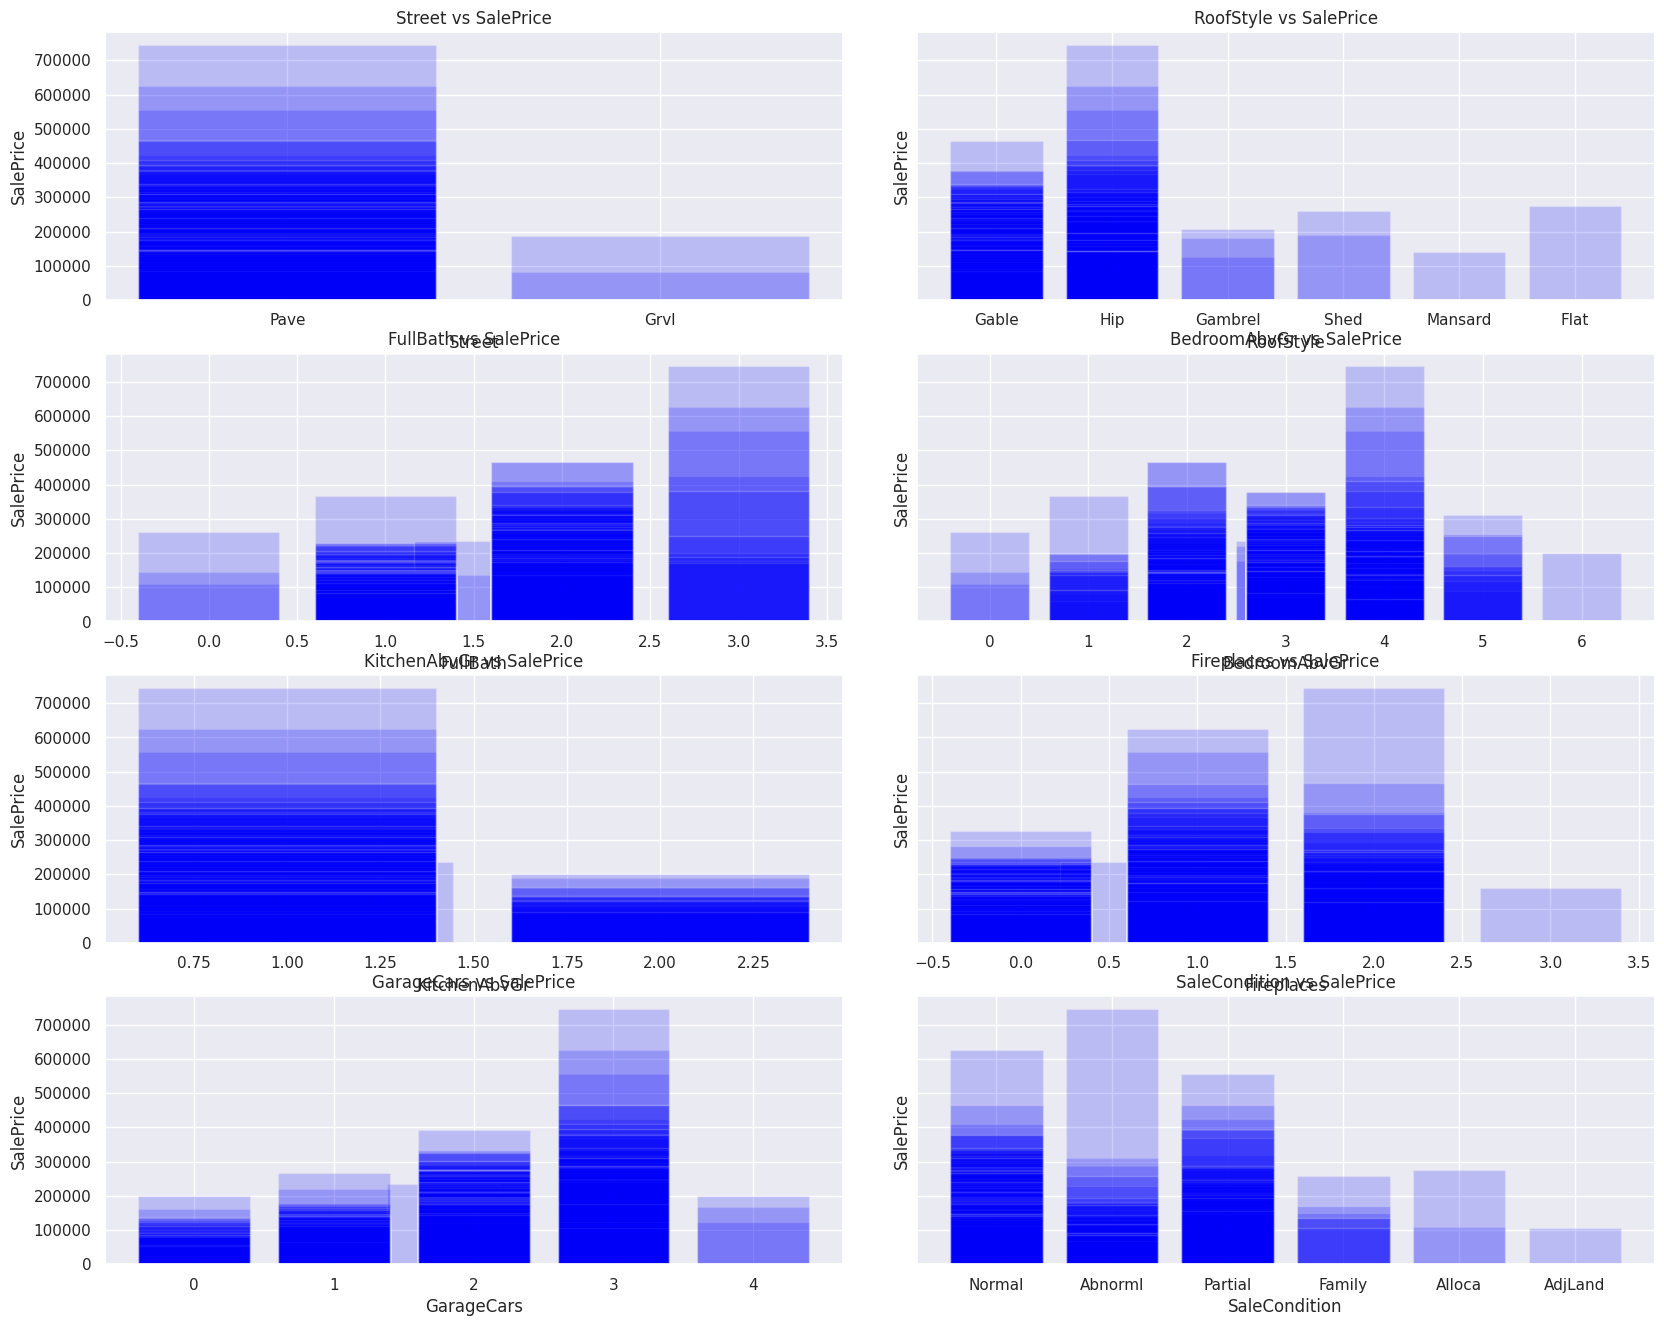

In [ ]:
columns_to_plot = [1, 7, 11, 12, 13, 14, 15, 16]
target = "SalePrice"

figure, axs = plt.subplots(len(columns_to_plot) // 2 + len(columns_to_plot) %
                        2, 2, figsize=(20, len(columns_to_plot) * 2), sharey=True, squeeze=True)

for i, column in enumerate(columns_to_plot):
    axs[i // 2, i % 2].bar(compare.iloc[:, column], compare[target], color='Blue', alpha=0.2)
    axs[i // 2, i % 2].set_xlabel(compare.columns[column])
    axs[i // 2, i % 2].set_ylabel(target)
    axs[i // 2, i % 2].set_title(f'{compare.columns[column]} vs {target}')

figure.subplots_adjust(wspace=0.1, hspace=0.2)

plt.show()

## **Pre Processed data**

In [ ]:
housing.info() #? FOCUS ON THE NON-NULL COUNT

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1022 non-null   float64
 1   Street         1022 non-null   object 
 2   Utilities      1022 non-null   object 
 3   Neighborhood   1022 non-null   object 
 4   BldgType       1022 non-null   object 
 5   HouseStyle     1022 non-null   object 
 6   YearBuilt      1022 non-null   float64
 7   RoofStyle      1022 non-null   object 
 8   Foundation     1022 non-null   object 
 9   Electrical     1022 non-null   object 
 10  GrLivArea      1022 non-null   float64
 11  FullBath       1022 non-null   float64
 12  BedroomAbvGr   1022 non-null   float64
 13  KitchenAbvGr   1022 non-null   float64
 14  Fireplaces     1022 non-null   float64
 15  GarageCars     1022 non-null   float64
 16  SaleCondition  1022 non-null   object 
 17  SalePrice      1022 non-null   int64  
dtypes: float

In [ ]:
(housing.isnull().sum())

LotArea          0
Street           0
Utilities        0
Neighborhood     0
BldgType         0
HouseStyle       0
YearBuilt        0
RoofStyle        0
Foundation       0
Electrical       0
GrLivArea        0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Fireplaces       0
GarageCars       0
SaleCondition    0
SalePrice        0
dtype: int64

In [ ]:
compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        438 non-null    float64
 1   Street         438 non-null    object 
 2   Utilities      438 non-null    object 
 3   Neighborhood   438 non-null    object 
 4   BldgType       438 non-null    object 
 5   HouseStyle     438 non-null    object 
 6   YearBuilt      438 non-null    float64
 7   RoofStyle      438 non-null    object 
 8   Foundation     438 non-null    object 
 9   Electrical     438 non-null    object 
 10  GrLivArea      438 non-null    float64
 11  FullBath       438 non-null    float64
 12  BedroomAbvGr   438 non-null    float64
 13  KitchenAbvGr   438 non-null    float64
 14  Fireplaces     438 non-null    float64
 15  GarageCars     438 non-null    float64
 16  SaleCondition  438 non-null    object 
 17  SalePrice      438 non-null    int64  
dtypes: float64

In [ ]:
compare.isnull().sum()

LotArea          0
Street           0
Utilities        0
Neighborhood     0
BldgType         0
HouseStyle       0
YearBuilt        0
RoofStyle        0
Foundation       0
Electrical       0
GrLivArea        0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Fireplaces       0
GarageCars       0
SaleCondition    0
SalePrice        0
dtype: int64

In [ ]:
print(housing.dtypes) #? SEARCH OBJECT OR STRING

LotArea          float64
Street            object
Utilities         object
Neighborhood      object
BldgType          object
HouseStyle        object
YearBuilt        float64
RoofStyle         object
Foundation        object
Electrical        object
GrLivArea        float64
FullBath         float64
BedroomAbvGr     float64
KitchenAbvGr     float64
Fireplaces       float64
GarageCars       float64
SaleCondition     object
SalePrice          int64
dtype: object


In [ ]:
categorical_cols = ['Street', 'Utilities', 'Neighborhood', 'BldgType',
                    'HouseStyle', 'RoofStyle', 'Foundation', 'Electrical', 'SaleCondition']

housing_encoded = pd.get_dummies(housing, columns=categorical_cols)

In [ ]:
general_dataset = housing_encoded

general_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 73 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotArea                1022 non-null   float64
 1   YearBuilt              1022 non-null   float64
 2   GrLivArea              1022 non-null   float64
 3   FullBath               1022 non-null   float64
 4   BedroomAbvGr           1022 non-null   float64
 5   KitchenAbvGr           1022 non-null   float64
 6   Fireplaces             1022 non-null   float64
 7   GarageCars             1022 non-null   float64
 8   SalePrice              1022 non-null   int64  
 9   Street_Grvl            1022 non-null   uint8  
 10  Street_Pave            1022 non-null   uint8  
 11  Utilities_AllPub       1022 non-null   uint8  
 12  Utilities_NoSeWa       1022 non-null   uint8  
 13  Neighborhood_Blmngtn   1022 non-null   uint8  
 14  Neighborhood_Blueste   1022 non-null   uint8  
 15  Neig

In [ ]:
compare_encoded = pd.get_dummies(compare, columns=categorical_cols)

In [ ]:
test_dataset = compare_encoded

test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 73 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotArea                438 non-null    float64
 1   YearBuilt              438 non-null    float64
 2   GrLivArea              438 non-null    float64
 3   FullBath               438 non-null    float64
 4   BedroomAbvGr           438 non-null    float64
 5   KitchenAbvGr           438 non-null    float64
 6   Fireplaces             438 non-null    float64
 7   GarageCars             438 non-null    float64
 8   SalePrice              438 non-null    int64  
 9   Street_Grvl            438 non-null    uint8  
 10  Street_Pave            438 non-null    uint8  
 11  Utilities_AllPub       438 non-null    uint8  
 12  Utilities_NoSeWa       438 non-null    uint8  
 13  Neighborhood_Blmngtn   438 non-null    uint8  
 14  Neighborhood_BrDale    438 non-null    uint8  
 15  Neighb

## **Standardization of Data**

In [ ]:
scaler = StandardScaler()

batch_size = 500

for i in range(0, len(housing_encoded), batch_size):
    scaler.partial_fit(housing_encoded[i:i+batch_size])

X_scaled = scaler.transform(housing_encoded)

X_scaled

array([[-1.95044130e-01,  1.04954213e+00,  4.00691137e-01, ...,
        -1.17851130e-01,  4.77875909e-01, -3.14523022e-01],
       [-9.32929546e-02,  1.48626898e-01, -4.81731636e-01, ...,
        -1.17851130e-01,  4.77875909e-01, -3.14523022e-01],
       [ 5.26978623e-02,  9.82807664e-01,  5.50387857e-01, ...,
        -1.17851130e-01,  4.77875909e-01, -3.14523022e-01],
       ...,
       [-6.76105991e-01,  1.11627659e+00, -1.12637588e-03, ...,
        -1.17851130e-01,  4.77875909e-01, -3.14523022e-01],
       [-3.21215587e-01,  1.11627659e+00, -7.37791816e-01, ...,
        -1.17851130e-01,  4.77875909e-01, -3.14523022e-01],
       [-2.87416501e-01,  1.14964382e+00, -5.64458771e-01, ...,
        -1.17851130e-01, -2.09259346e+00,  3.17941750e+00]])

<ipython-input-269-38b0a0afc942>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_before = housing.corr()


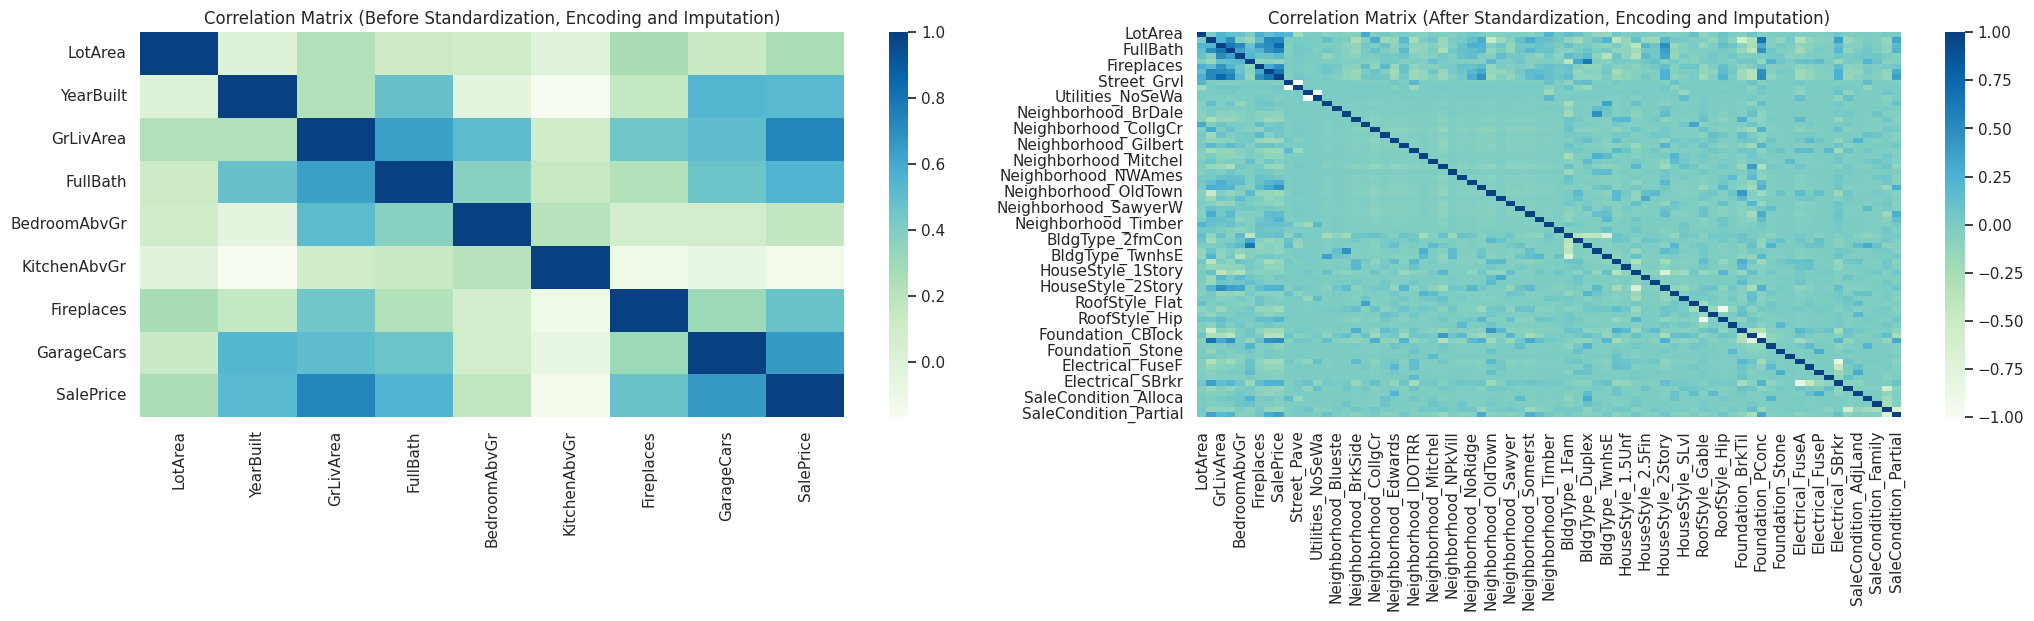

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=housing_encoded.columns)

corr_before = housing.corr()

corr_after = X_scaled_df.corr()

fig, axs = plt.subplots(ncols=2, figsize=(25, 5))
sns.heatmap(corr_before, ax=axs[0],cmap="GnBu")
axs[0].set_title('Correlation Matrix (Before Standardization, Encoding and Imputation)')
sns.heatmap(corr_after, ax=axs[1],cmap="GnBu")
axs[1].set_title('Correlation Matrix (After Standardization, Encoding and Imputation)')
plt.show()

In [ ]:
scaler = StandardScaler()

batch_size = 500

for i in range(0, len(compare_encoded), batch_size):
    scaler.partial_fit(compare_encoded[i:i+batch_size])

X_scaled1 = scaler.transform(compare_encoded)

X_scaled1

array([[-0.13030163, -1.32732843, -0.51299057, ..., -0.11785113,
         0.4472136 , -0.28544961],
       [-1.20882842,  1.13487032, -0.05637713, ..., -0.11785113,
         0.4472136 , -0.28544961],
       [ 0.91409565,  0.18282014,  2.43002572, ..., -0.11785113,
        -2.23606798, -0.28544961],
       ...,
       [-0.19873301, -0.96620594,  1.43475112, ..., -0.11785113,
         0.4472136 , -0.28544961],
       [-0.08238243, -0.67074209, -0.81621043, ..., -0.11785113,
         0.4472136 , -0.28544961],
       [-0.04446076, -0.17830234, -0.4987214 , ..., -0.11785113,
         0.4472136 , -0.28544961]])

<ipython-input-271-db15482b013e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_before = compare.corr()


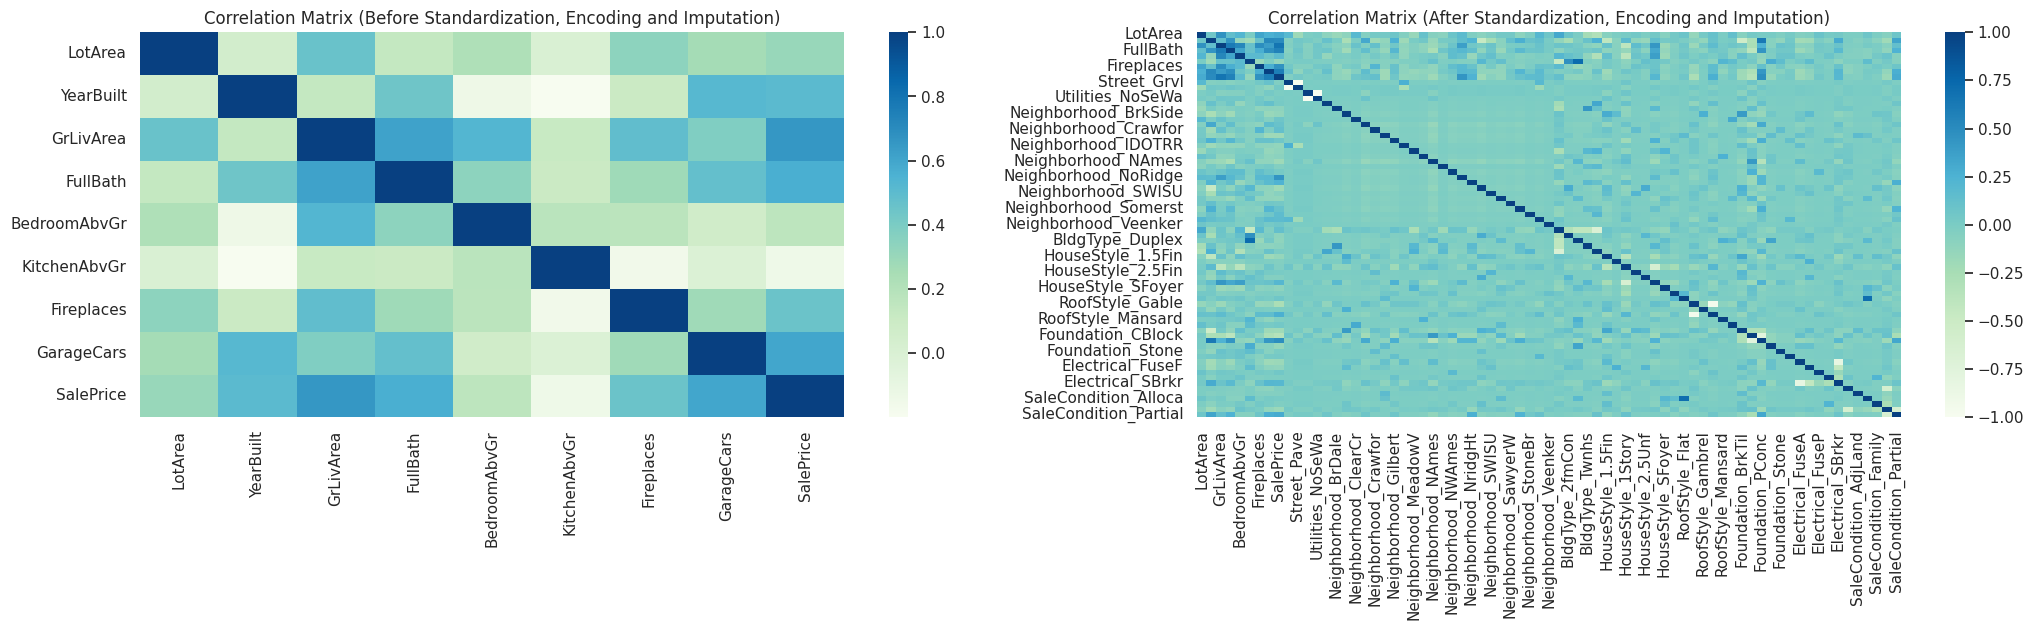

In [ ]:
X_scaled1_df = pd.DataFrame(X_scaled1, columns=compare_encoded.columns)

corr_before = compare.corr()

corr_after = X_scaled1_df.corr()

fig, axs = plt.subplots(ncols=2, figsize=(25, 5))
sns.heatmap(corr_before, ax=axs[0],cmap="GnBu")
axs[0].set_title('Correlation Matrix (Before Standardization, Encoding and Imputation)')
sns.heatmap(corr_after, ax=axs[1],cmap="GnBu")
axs[1].set_title('Correlation Matrix (After Standardization, Encoding and Imputation)')
plt.show()

## **Checking Features correlation with the sale price**

In [ ]:
X = X_scaled
y = housing_encoded['SalePrice'].to_numpy()

In [ ]:
X_dataframe = pd.DataFrame(X, columns=housing_encoded.columns[:])
y_dataframe = pd.DataFrame(housing_encoded['SalePrice'], columns=['SalePrice'])

corr_matrix = pd.concat([X_dataframe, y_dataframe], axis=1).corr()

correlations = corr_matrix.iloc[-1, :-1]

print(correlations.sort_values(ascending=False).head(5))

SalePrice     1.000000
GrLivArea     0.732663
GarageCars    0.657339
FullBath      0.556940
YearBuilt     0.528285
Name: SalePrice, dtype: float64


In [ ]:
X_train= X_scaled
X_test= X_scaled1
y_train= housing_encoded['SalePrice'].to_numpy()
y_test= compare_encoded['SalePrice'].to_numpy()


In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print(" ")

print("Total number of samples:", len(X_train)+len(X_test))
print("Number of samples in the training set:", len(X_train))
print("Number of samples in the testing set:", len(X_test))


test_size_example = len(X_test) / (len(X_train)+len(X_test))
print("Test size proportion:", test_size_example)

print("Difference:", np.abs(test_size_example - 0.3))

X_train shape: (1022, 73)
X_test shape: (438, 73)
y_train shape: (1022,)
y_test shape: (438,)
 
Total number of samples: 1460
Number of samples in the training set: 1022
Number of samples in the testing set: 438
Test size proportion: 0.3
Difference: 0.0


# **MODELS Training & Testing**

## **Linear Regression**

In [ ]:
linreg = LinearRegression().fit(X_train, y_train)

In [ ]:
residuals = y_train - linreg.predict(X_train)
outlier_threshold = 3*np.std(residuals)
outliers = np.abs(residuals) > outlier_threshold

In [ ]:
linreg_score = 0

if np.all(outliers):
    print("All samples are outliers, cannot fit a linear regression model")
else:
    X_train_cleaned, y_train_cleaned = X_train[~outliers], y_train[~outliers]

    linreg_cleaned = LinearRegression().fit(X_train_cleaned, y_train_cleaned)

    y_pred_cleaned = linreg_cleaned.predict(X_test)

    mse_cleaned = mean_squared_error(y_test, y_pred_cleaned)
    rmse_cleaned = np.sqrt(mse_cleaned)
    mae = mean_absolute_error(y_test, y_pred_cleaned)

    r2_score_cleaned = r2_score(y_test, y_pred_cleaned) * 100

    linreg_score = r2_score_cleaned
    linreg_mae = mae

    print(f"Mean Squared Error: {mse_cleaned:.2f}")
    print(f"Root Mean Squared Error: {rmse_cleaned:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(" ")
    print(f"R^2 Score: {r2_score_cleaned:.6f}%")

Mean Squared Error: 91596155.79
Root Mean Squared Error: 9570.59
Mean Absolute Error: 5384.56
 
R^2 Score: 98.511402%


In [ ]:
train_accuracy = linreg_cleaned.score(X_train_cleaned, y_train_cleaned)

test_accuracy = linreg_cleaned.score(X_test, y_test)

print('Training accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

Training accuracy: 1.0
Test accuracy: 0.9851140239338162


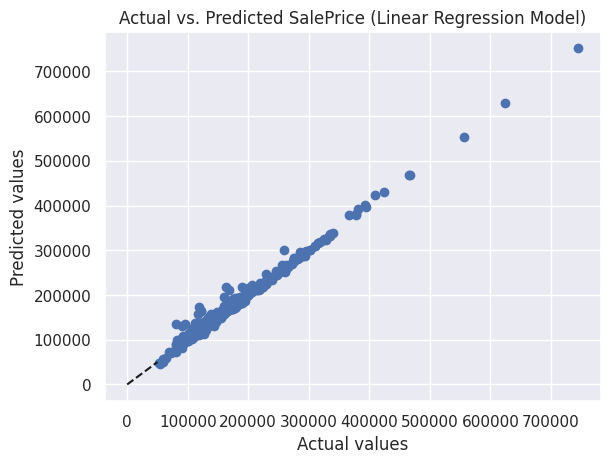

In [ ]:
plt.scatter(y_test, y_pred_cleaned)
plt.plot([0, 50000], [0, 50000], '--k')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted SalePrice (Linear Regression Model)')
plt.show()

## **K-Nearest Neighbors (KNN)**

In [ ]:
X_train = housing_encoded.drop(['SalePrice'], axis=1)
y_train = housing_encoded['SalePrice']

X_test = compare_encoded.drop(['SalePrice'], axis=1)
y_test = compare_encoded['SalePrice']

r_scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.fit_transform(X_test)

x_train = pd.DataFrame(x_train_scaled)
x_test = pd.DataFrame(x_test_scaled)

In [ ]:
rmse_val = []
mse_val = []
for k in range(1, 20):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    rmse_val.append(rmse)
    mse_val.append(mse)
    print(f"Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = {k}:    {mse:.2f} | {rmse:.2f}")

Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 1:    4844870934.57 | 69605.11
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 2:    4361341705.48 | 66040.46
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 3:    4283584204.84 | 65449.10
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 4:    4298257454.51 | 65561.10
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 5:    4130062940.56 | 64265.57
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 6:    4194976870.68 | 64768.64
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 7:    4195408233.41 | 64771.97
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 8:    4152773153.13 | 64442.01
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 9:    4147971398.24 | 64404.75
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 10:    4159054859.91 | 64490.73
Mean Squared Error(MSE) | Root Mean Squared Error

Text(0, 0.5, 'RMSE')

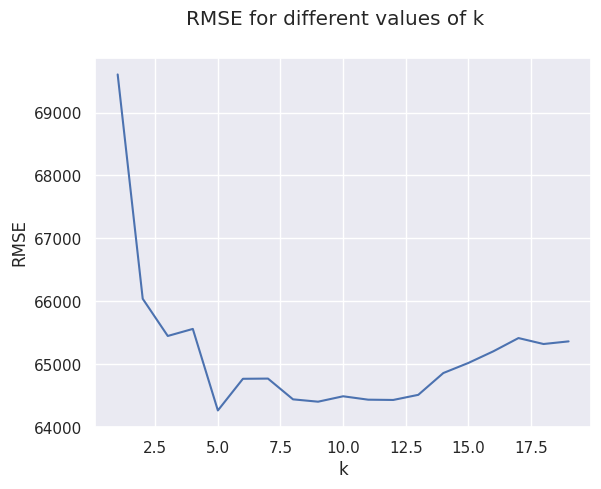

In [ ]:
fig, axs = plt.subplots(1)
fig.suptitle('RMSE for different values of k')
axs.plot(range(1, 20), rmse_val)
axs.set_xlabel('k')
axs.set_ylabel('RMSE')

In [ ]:
optimal_k_rmse = rmse_val.index(min(rmse_val)) + 1
print(f"The optimal value of k based on RMSE is {optimal_k_rmse}")

The optimal value of k based on RMSE is 5


In [ ]:
# Fit the model on the training data using the optimal value of k
k = optimal_k_rmse  # or optimal_k_mse if you prefer
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)

neg_preds = []

for pred in y_pred:
    if pred < 0:
        neg_preds.append(pred)
if len(neg_preds) > 0:
    print("Negative predicted values:", neg_preds)
else:
    print("No negative predicted values")

min_pred = min(y_pred)
max_pred = max(y_pred)

print("Minimum predicted value:", min_pred)
print("Maximum predicted value:", max_pred)

No negative predicted values
Minimum predicted value: 84980.0
Maximum predicted value: 389451.2


In [ ]:
test_rmse = sqrt(mean_squared_error(y_test, y_pred))
test_mse = mean_squared_error(y_test, y_pred)

test_r2 = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)

knn_score = test_r2
knn_mae = mae

print(f"Mean Squared Error: {test_mse:.2f}")
print(f"Root Mean Squared Error: {test_rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(" ")
print(f"R^2 score: {test_r2:.2f}%")

Mean Squared Error: 4130062940.56
Root Mean Squared Error: 64265.57
Mean Absolute Error: 41147.09
 
R^2 score: 32.88%


In [ ]:
train_accuracy = knn_model.score(x_train, y_train)
test_accuracy = knn_model.score(x_test, y_test)

print('Training accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

Training accuracy: 0.7911142120913112
Test accuracy: 0.3287925944987794


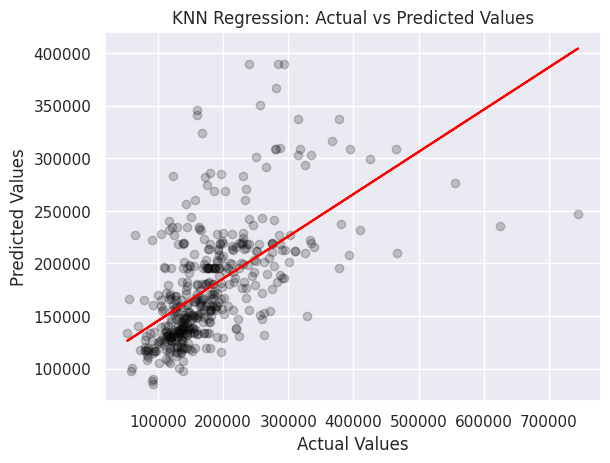

In [ ]:
plt.scatter(y_test, y_pred, color='black', alpha=0.2)

coefficients = np.polyfit(y_test, y_pred, 1)
polynomial = np.poly1d(coefficients)
plt.plot(y_test, polynomial(y_test), color='red')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression: Actual vs Predicted Values')
plt.show()

## **Support Vector Machine (SVM)**

In [ ]:
X_train = housing_encoded.iloc[:, 1:8].values
y_train = housing_encoded.iloc[:, 8].values
X_test = compare_encoded.iloc[:, 1:8].values
y_test = compare_encoded.iloc[:, 8].values

scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
svm_model = SVR(kernel='poly', C= 1000000, coef0=0.1)

svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

neg_preds = []

for pred in y_pred:
    if pred < 0:
        neg_preds.append(pred)
if len(neg_preds) > 0:
    print("Negative predicted values:", neg_preds)
else:
    print("No negative predicted values")

min_pred = min(y_pred)
max_pred = max(y_pred)
print("Minimum predicted value:", min_pred)
print("Maximum predicted value:", max_pred)

No negative predicted values
Minimum predicted value: 15953.973721010581
Maximum predicted value: 776560.1882621826


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)*100

svm_score = r2
svm_mae = mae

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(" ")
print(f"R^2 score: {r2:.2f}%")

Mean Squared Error: 1542482940.44
Root Mean Squared Error: 39274.46
Mean Absolute Error: 24925.53
 
R^2 score: 74.93%


In [ ]:
train_accuracy = svm_model.score(X_train_scaled, y_train)
test_accuracy = svm_model.score(X_test_scaled, y_test)

print('Training accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

Training accuracy: 0.8729231275924633
Test accuracy: 0.7493195654917979


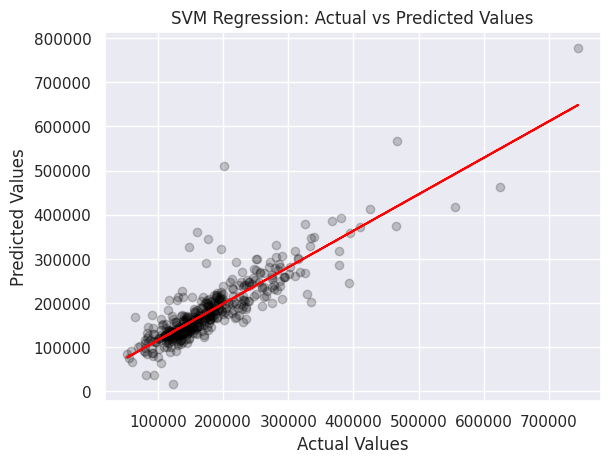

In [ ]:
plt.scatter(y_test, y_pred, color='black', alpha=0.2)

coefficients = np.polyfit(y_test, y_pred, 1)
polynomial = np.poly1d(coefficients)
plt.plot(y_test, polynomial(y_test), color='red')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVM Regression: Actual vs Predicted Values')
plt.show()

# **Output Analysis**

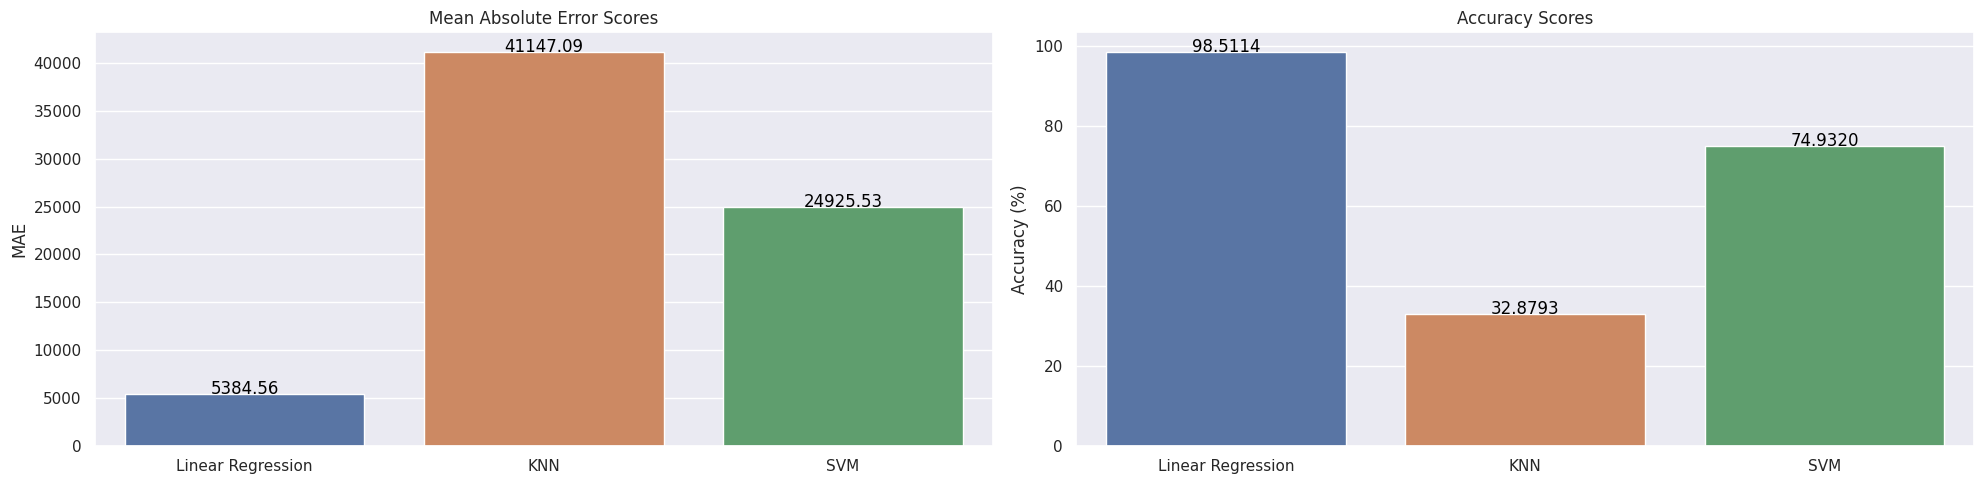

In [ ]:
models = ['Linear Regression', 'KNN', 'SVM']
mae_scores = [linreg_mae, knn_mae, svm_mae]
accuracy_scores = [linreg_score, knn_score, svm_score]

sns.set(style="darkgrid")

# Create a Seaborn bar chart with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.barplot(x=models, y=mae_scores, ax=axs[0])
axs[0].set_title('Mean Absolute Error Scores')
axs[0].set_ylabel('MAE')

for i, v in enumerate(mae_scores):
    axs[0].text(i, v, f"{v:.2f}", color='black', ha="center")


sns.barplot(x=models, y=accuracy_scores, ax=axs[1])
axs[1].set_title('Accuracy Scores')
axs[1].set_ylabel('Accuracy (%)')

for i, v in enumerate(accuracy_scores):
    axs[1].text(i, v, f"{v:.4f}", color='black', ha="center")

fig.tight_layout()
plt.show()

In [ ]:
print(F'''The models prediction accuracy are as follows:

Linear Regression: {linreg_score:.4f}%
K-Nearest Neighbors: {knn_score:.4f}%
Support Machine Vector: {svm_score:.4f}%
''')

The models prediction accuracy are as follows:

Linear Regression: 98.5114%
K-Nearest Neighbors: 32.8793%
Support Machine Vector: 74.9320%

